# Analyzing Trends in IUCN Critically Endangered Species
Chloe Kanders and Sawyer Huang

## Introduction
In this project, we are compiling information from the IUCN (International Union for Conservation of Nature) Red List database, which contains data about threatened species all over the world, classifying them by multiple criteria. To find out more about the IUCN Red List visit: https://www.iucnredlist.org/. Because our data is primarily qualitative, we decided to focus on trends occurring within groups. Our goal is to determine trends between the IUCN Red List Criteria categories and variables such as regions and systems.

We decided to analyze critically endangered species only because these species are not yet extinct, but are in extreme danger of becoming extinct and could potentially receive aid to change their trajectory. We selected 4 regions arbitrarily out of the 13 regions listed on the IUCN Red List site. Additionally, we decided to narrow our focus to the general categories in the IUCN Red List Criteria because some of the subcategories were extremely specific, so our analysis would not be an accurate representation of the data. 

**Research Question:** Which regions and systems contain the most concentrated populations of the IUCN Red List Criteria categories and how do the geographical variables correlate to the different categories?

**Hypothesis:** If there are a very high number of species in our dataset, then there will be a fair distribution of species in each criteria category across all regions and systems.

## Data Description

The observations (rows) are individual species and the attributes (columns) are descriptive quantifiers of the species. For a particular species, we are primarily interested in the region of the species, the particular environment where the species is found (system), and its IUCN Red List Criteria categories. Our final dataset had 685 distinct species and 25 attributes.

### Dataset Creation
The IUCN Red List gauges the health of the world's biodiversity. It does this by compiling annual lists of fungi, plantae, animalia, and chromista that guide international biodiversity conservation and policy change. The original tables were created so that government agencies, wildlife departments, conservation-related non-governmental organisations (NGOs), natural resource planners, educational organisations, students, and the business community could all have a standard system to monitor the health of the world's biodiversity.

We created our dataset by combining applicable data from 8 tables offered by the IUCN Red List. It serves as a tool to demonstrate the correlation between various variables that could have some relationship with rapidly declining population rates among species.

### Funding
The data collection performed that provided our dataset was funded by the many sponsors that donate to the IUCN Red List. The complete list of sponsors can be found at: https://www.iucnredlist.org/about/sponsors. The list of sponsors includes but is not limited to:
- Toyota
- The Rufford Foundation
- The IUCN Red List Partners

### Collection Processes
- No animals were harmed in the collection of our data. 
- The IUCN Red List has made it public that their human workers are limited. Thus, the IUCN Red List has an "out of date" policy for all data older than 10 years, but cannot guarantee all data is updated annually.

### Preprocessing
We retrieved folders with multiple CSV files for each region and parsed through the assessments and simple_summary files, extracting columns we felt could potentially be relevant to our research question. We created a new dataset in which the data was compiled into one CSV file. We parsed out html tags, removed duplicate species, removed empty rows, translated the IUCN Red List Criteria rubric system, scanned the IUCN Red List Criteria column for the specific categories we identified using regular expressions, dropped thousands of empty columns and rows that appeared during processing, converted categorical data to indicator variables for a few columns, added those columns to our dataframe, and wrote this dataframe into a new CSV file.

### Raw Data
https://drive.google.com/open?id=16K9s9740Rzbv4rJgmygf-2nyyC3eusyw 

### Red List Criteria
* **A:** Greater than or equal to 80% projected decrease in population rate
* **B:** Limited to geographic location of less than 100 km^2
* **C:** Population size estimated to a number less than 250 mature individuals
* **D:** Population size estimated to a number less than 50 mature individuals
* **E:** Greater than 50% chance of extinction within 10 years or 3 generations

More details can be found in the Official IUCN Red List Handbook found here: (https://portals.iucn.org/library/sites/library/files/documents/RL-2001-001-2nd.pdf).

## Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

In [2]:
critically_endangered = pd.read_csv("critically_endangered_processed.csv")

### Region vs Criteria Distributions

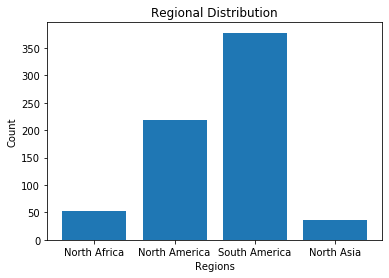

In [3]:
NAf= critically_endangered['North Africa'].sum()
NAm= critically_endangered['North America'].sum()
NAs= critically_endangered['North Asia'].sum()
SAm= critically_endangered['South America'].sum()

regions = ["North Africa", 'North America', 'South America', 'North Asia']
sums = [NAf, NAm, SAm, NAs]

plt.bar(regions,sums)
plt.title('Regional Distribution')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.show()

The data shows that South America contains the most critically endangered species, with North America as a being the second most populated. There are extremely low numbers of critically endangered species in North Africa and North Asia.

In [4]:
mean = (NAf + NAm + NAs + SAm)/4
print("Mean number of species per region:", mean)

std = np.sqrt(np.var(sums))
print("Standard deviation of species per region:", std)

Mean number of species per region: 171.25
Standard deviation of species per region: 138.90171885185583


Because the data is very concentrated in two regions, South America and North America, and sparsely concentrated in the other two regions, North Africa and North Asia, there is a lot of variance within the data, represented by a high standard deviation.

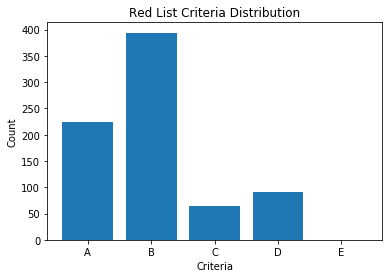

In [5]:
categories=['A','B','C','D','E']
sums=[critically_endangered['A'].sum(), critically_endangered['B'].sum(), critically_endangered['C'].sum(), critically_endangered['D'].sum(), critically_endangered['E'].sum()]

plt.bar(categories,sums)
plt.title('Red List Criteria Distribution')
plt.xlabel('Criteria')
plt.ylabel('Count')
plt.show()

Categories A and B are most prevalent, and C, D and E are not as prevalent in the data. Category E is not present in our data at all. This means that there are no species in our data with greater than a 50% chance of extinction within 10 years or 3 generations. This is significant since the goal of the IUCN Red List is to prevent any animals from being lost to extinction.

In [6]:
# defined helper function to add lists
# returns the sum of the values that have the same index for the two lists
def add_lists(list1,list2):
    list3=[]
    for i in range(len(list1)):
        list3.append(list1[i]+list2[i])
    return list3

The add_lists function is neccessary to create a stacked bar graph. The function adds the previous lists together, ensuring that they are not concatenated in the creation of the bar graph.

In [7]:
# define function to assist in plotting a stacked bar graph indicating region distribution over categories
# returns a list of the sums of the criterias in a specific region
def crit_region_graph(region):
    
    tempdf = critically_endangered
    criterias=['A','B','C','D','E']
    counts=[]
    
    tempdf = critically_endangered[critically_endangered['Region']==region]
    
    for criteria in criterias:
        counts.append(tempdf[criteria].sum())
    
    return counts

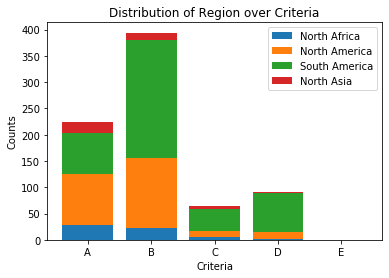

In [8]:
countsNAF = crit_region_graph('North Africa')
countsNAM = crit_region_graph('North America')
countsSAM = crit_region_graph('South America')
countsNAS = crit_region_graph('North Asia')

# plot distribution of region over criteria
NAF_plot = plt.bar(['A','B','C','D','E'],height=countsNAF)
NAM_plot = plt.bar(['A','B','C','D','E'],height=countsNAM, bottom = countsNAF)
SAM_plot = plt.bar(['A','B','C','D','E'],height=countsSAM, bottom = add_lists(countsNAF,countsNAM))
NAS_plot = plt.bar(['A','B','C','D','E'],height=countsNAS, bottom = add_lists(add_lists(countsNAF,countsNAM),countsSAM))

plt.title('Distribution of Region over Criteria')
plt.legend((NAF_plot, NAM_plot, SAM_plot, NAS_plot), ('North Africa', 'North America', 'South America', 'North Asia'))
plt.xlabel('Criteria')
plt.ylabel('Counts')
plt.show()

There isn't an even distribution of the criteria across the regions. South America contains a substantial amount of species across A, B, C, and D. However, for A, there is a greater number of species in North America than South America.

In [9]:
# define function to assist in plotting stacked bar graph indicating criteria distribution over regions
# returns a list of the sums of the regions for a specific criteria
def regiongraph(criteria):
    
    regions=['North Africa', 'North America', 'South America', "North Asia"]
    
    counts=[]
    
    # loop through list of regions to sum a column in the new dataframe with criteria dummy variables
    for region in regions:
        tempdf = critically_endangered
        tempdf = tempdf[tempdf[criteria]==1]
        tempdf = tempdf[tempdf['Region']==region]
        
        counts.append(tempdf['Region'].count())
     
    return counts

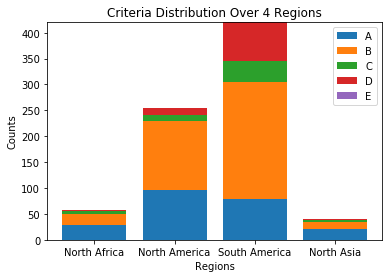

In [10]:
region_countsA = regiongraph('A')
region_countsB = regiongraph('B')
region_countsC = regiongraph('C')
region_countsD = regiongraph('D')
region_countsE = regiongraph('E')

A_plot = plt.bar(['North Africa', 'North America', 'South America', "North Asia"],height=region_countsA)
B_plot = plt.bar(['North Africa', 'North America', 'South America', "North Asia"],height=region_countsB, bottom = region_countsA)
C_plot = plt.bar(['North Africa', 'North America', 'South America', "North Asia"],height=region_countsC, bottom = add_lists(region_countsA,region_countsB))
D_plot = plt.bar(['North Africa', 'North America', 'South America', "North Asia"],height=region_countsD, bottom = add_lists(add_lists(region_countsA,region_countsB),region_countsC))
E_plot = plt.bar(['North Africa', 'North America', 'South America', "North Asia"],height=region_countsE, bottom = add_lists(add_lists(add_lists(region_countsA,region_countsB),region_countsC),region_countsD))

plt.title('Criteria Distribution Over 4 Regions')
plt.legend((A_plot, B_plot, C_plot, D_plot, E_plot), ('A', 'B', 'C', 'D', 'E'))
plt.xlabel('Regions')
plt.ylabel('Counts')
plt.show()

We further analyzed the distribution of criteria amongst the different regions. B is found in all regions, but primarily South and North America. Therefore, there are more extreme fluctuations and trends of continuing decline in contained regions in South and North America. 

D is chiefly found in South America with the next most significant population in North America. South America has by far the most species with less than 50 mature individuals left in the population, further emphasizing the extremity of the situation in South and North America. 

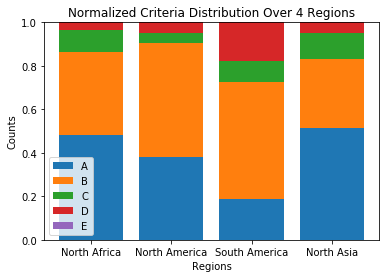

In [11]:
totals = []

# find the total number of species in each region
for x in range(len(region_countsA)):
    totals.append(region_countsA[x]+region_countsB[x]+region_countsC[x]+region_countsD[x]+region_countsE[x])

region_percentsA = []
region_percentsB = []
region_percentsC = []
region_percentsD = []
region_percentsE = []
    
# divide by total counts to get percentages for normalized graph
for x in range(len(region_countsA)):
    region_percentsA.append(region_countsA[x]/totals[x])
    region_percentsB.append(region_countsB[x]/totals[x])
    region_percentsC.append(region_countsC[x]/totals[x])
    region_percentsD.append(region_countsD[x]/totals[x])
    region_percentsE.append(region_countsE[x]/totals[x])

A_plot = plt.bar(['North Africa', 'North America', 'South America', "North Asia"],height=region_percentsA)
B_plot = plt.bar(['North Africa', 'North America', 'South America', "North Asia"],height=region_percentsB, bottom = region_percentsA)
C_plot = plt.bar(['North Africa', 'North America', 'South America', "North Asia"],height=region_percentsC, bottom = add_lists(region_percentsA,region_percentsB))
D_plot = plt.bar(['North Africa', 'North America', 'South America', "North Asia"],height=region_percentsD, bottom = add_lists(add_lists(region_percentsA,region_percentsB),region_percentsC))
E_plot = plt.bar(['North Africa', 'North America', 'South America', "North Asia"],height=region_percentsE, bottom = add_lists(add_lists(add_lists(region_percentsA,region_percentsB),region_percentsC),region_percentsD))

plt.title('Normalized Criteria Distribution Over 4 Regions')
plt.legend((A_plot, B_plot, C_plot, D_plot, E_plot), ('A', 'B', 'C', 'D', 'E'))
plt.xlabel('Regions')
plt.ylabel('Counts')
plt.show()

After normalizing the data, we observed that there are similar categorical breakdowns in each region, with A and B dominating each region and small amounts of C and D. We originally thought that D is primarily found in South America and North America, but this representation makes it more clear that there are also similar percentages of species with D. Although South America has the highest population counts, it has the lowest percentage of species in A.

Therefore, all regions have a significant percentage of species with greater than or equal to 80% projected population decrease. They also have a rather significant proportion of species that are limited to a geographic location of less than 100 km^2. While North Africa, North America, and North Asia all have similar proportions of species with a population estimated to be less than 50, South America has a more significant proportion of these species, which emphasizes the extremity of the situation in South America. 

The reason why South America has such a high number of species with low populations (under 50) and so few species that are projected to decrease could be because there have already been measures enacted to protect these critically endangered species.

### Evaluation of Significance

In [12]:
# define function to help find means of lists
# returns mean of a list counts
def mean_count(counts):
    sums = 0
    for x in range(len(counts)):
        sums+=counts[x]
    return sums/len(counts)

In [13]:
# define function to help graph a random normalized simulation of criteria by counts
# returns a list of heights and means for the criteria counts for later calculations
def simulation(values, title):
    means=[]
    meansA = []
    meansB = []
    meansC = []
    meansD = []
    meansE = []
    
    num=0

    for i in range(10000):
        means.append([])
        counts=[]

        # finds random numbers of species for a given criteria, chosen from 0 to 300 because that is the
        # approximate range of real counts
        for ind in range(5):
            randomA = np.random.randint(0,300)
            randomB = np.random.randint(0,300)
            randomC = np.random.randint(0,300)
            randomD = np.random.randint(0,300)
            randomE = np.random.randint(0,300)

            total = randomA+randomB+randomC+randomD+randomE
            counts.append([randomA, randomB, randomC, randomD, randomE, total])
        
        # separates the values into multiple lists of heights
        height = []
        for val in range(5):
            height.append([])
            for i_val in range(len(values)):
                height[val].append(counts[i_val][val]/counts[i_val][5])

        # appends the means to respective means lists for later calculations
        meansA.append(mean_count(height[0]))
        meansB.append(mean_count(height[1]))
        meansC.append(mean_count(height[2]))
        meansD.append(mean_count(height[3]))
        meansE.append(mean_count(height[4]))

        # appends the height lists to means list
        means[i].append(height[0])
        means[i].append(height[1])
        means[i].append(height[2])
        means[i].append(height[3])
        means[i].append(height[4])

    return [[height[0],height[1],height[2],height[3],height[4]],[meansA,meansB,meansC,meansD,meansE]]

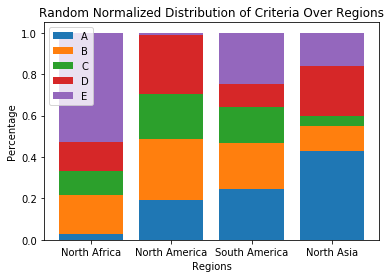

In [14]:
regions=['North Africa', 'North America', 'South America', "North Asia"]
region_meanlist = simulation(regions, "Regions")
        
# plot the last simulation to show what a random chart looks like
b1=plt.bar(regions,region_meanlist[0][0])
b2=plt.bar(regions,region_meanlist[0][1], bottom=region_meanlist[0][0])
b3=plt.bar(regions,region_meanlist[0][2], bottom=add_lists(region_meanlist[0][0],region_meanlist[0][1]))
b4=plt.bar(regions,region_meanlist[0][3], bottom=add_lists(add_lists(region_meanlist[0][0],region_meanlist[0][1]),region_meanlist[0][2]))
b5=plt.bar(regions,region_meanlist[0][4], bottom=add_lists(add_lists(add_lists(region_meanlist[0][0],region_meanlist[0][1]),region_meanlist[0][2]),region_meanlist[0][3]))

plt.legend((b1,b2,b3,b4,b5),('A','B','C','D','E'))
plt.title('Random Normalized Distribution of Criteria Over Regions')
plt.xlabel('Regions')
plt.ylabel('Percentage')
plt.show()

We created a simulation to model the expected normalized distribution of criteria over regions in a bar graph in order to represent our original hypothesis. We ran the simulation 10,000 times to approximate a near accurate distribution and this is one of the 10,000 criteria distribution simulations. 

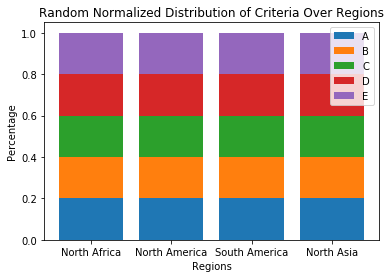

In [15]:
regions=['North Africa', 'North America', 'South America', "North Asia"]
region_meanlist_means = simulation(regions, "Regions")

list_a = [mean_count(region_meanlist_means[1][0])]
list_b = [mean_count(region_meanlist_means[1][1])]
list_c = [mean_count(region_meanlist_means[1][2])]
list_d = [mean_count(region_meanlist_means[1][3])]

b1=plt.bar(regions,mean_count(region_meanlist_means[1][0]))
b2=plt.bar(regions,mean_count(region_meanlist_means[1][1]), bottom=list_a)
b3=plt.bar(regions,mean_count(region_meanlist_means[1][2]), bottom=add_lists(list_a, list_b))
b4=plt.bar(regions,mean_count(region_meanlist_means[1][3]), bottom=add_lists(add_lists(list_a,list_b),(list_c)))
b5=plt.bar(regions,mean_count(region_meanlist_means[1][4]), bottom=add_lists(add_lists(add_lists(list_a,list_b),(list_c)),list_d))

plt.legend((b1,b2,b3,b4,b5),('A','B','C','D','E'))
plt.title('Random Normalized Distribution of Criteria Over Regions')
plt.xlabel('Regions')
plt.ylabel('Percentage')
plt.show()

This graph displays the average mean of the 10,000 simulations for each criteria across each region. We did this instead of calculating individual means for each criteria given each region to simplify our simulation process and felt justified in doing so as each mean is approximately 0.2.

In [16]:
region_total_meanA = mean_count(region_meanlist_means[1][0])
region_total_meanB = mean_count(region_meanlist_means[1][1])
region_total_meanC = mean_count(region_meanlist_means[1][2])
region_total_meanD = mean_count(region_meanlist_means[1][3])
region_total_meanE = mean_count(region_meanlist_means[1][4])

print("Expected Mean of Criteria A:", region_total_meanA)
print("Expected Mean of Criteria B:", region_total_meanB)
print("Expected Mean of Criteria C:", region_total_meanC)
print("Expected Mean of Criteria D:", region_total_meanD)
print("Expected Mean of Criteria E:", region_total_meanE)

Expected Mean of Criteria A: 0.199859253730417
Expected Mean of Criteria B: 0.1997709211630274
Expected Mean of Criteria C: 0.1993911002302547
Expected Mean of Criteria D: 0.20081393429144737
Expected Mean of Criteria E: 0.20016479058485426


The calculated expected means for each criteria are approximately 0.2, which reflects our hypothesis that there is an equal probability that species in each Red List criteria are evenly distributed amongst regions. 

### Statistical Analysis

In [17]:
# define helper function to calculate standard deviation between observed values and their mean
# returns calculated standard deviation
def sd(observed, expected):
    sums=[]
    for val in range(len(observed)):
        sums.append((observed[val]-expected)**2)
    return np.sqrt(mean_count(sums))

In [18]:
# define helper function to calculate z-scores of expected and observed means
# returns calculated z-score
def z_score(observed, expected):
    z_list = []
    for val in range(len(observed)):
        z_list.append((observed[val]-expected)/sd(observed, expected))
    return z_list

In order to determine the proximity of the observed criteria distributions in our dataset to the expected criteria distributions calculated in our simulation, we calculated the z-scores of the criteria in each region. The z-score measures the number of standard deviations the observed percentage of species in a criteria is away from the expected mean percentage of species in a criteria. 

In [19]:
# define function to plot z-scores of criteria distributions over region over a normal distribution
# returns nothing but plots the graph
def region_distribution_plot(zscores, title, c):
    
    # we chose the x axis to range from -5.5 to 5.5 because it best showed our data
    x_vals = np.linspace(-5.5,5.5,500)
    plt.plot(x_vals, norm.pdf(x_vals, 0, 1))
    scatter_NAf=plt.scatter(zscores[0], norm.pdf(zscores[0], 0, 1), c=c[0])
    scatter_NAm=plt.scatter(zscores[1], norm.pdf(zscores[1], 0, 1), c=c[1])
    scatter_SAm=plt.scatter(zscores[2], norm.pdf(zscores[2], 0, 1), c=c[2])
    scatter_NAs=plt.scatter(zscores[3], norm.pdf(zscores[3], 0, 1), c=c[3])
    plt.title(title)
    plt.xlabel("Z Scores")
    plt.ylabel("Density")
    plt.legend((scatter_NAf, scatter_NAm, scatter_SAm, scatter_NAs), ('North Africa', 'North America', 'South America', "North Asia"))
    plt.show()

In [20]:
# create a dataframe with z-scores for each criteria and region
z_df_expected_region = pd.DataFrame({'Region': ['North Africa', 'North America', 'South America', "North Asia"], 'z_scoreA': z_score(region_percentsA, region_total_meanA), 'z_scoreB': z_score(region_percentsB, region_total_meanB), 'z_scoreC': z_score(region_percentsC, region_total_meanC), 'z_scoreD': z_score(region_percentsD, region_total_meanD), 'z_scoreE': z_score(region_percentsE, region_total_meanE)})                                                                                                                                                                                                                          
print(z_df_expected_region)

          Region  z_scoreA  z_scoreB  z_scoreC  z_scoreD  z_scoreE
0   North Africa  1.231976  0.697093 -0.862961 -1.224742      -1.0
1  North America  0.792710  1.257409 -1.403903 -1.101787      -1.0
2  South America -0.061599  1.313603 -0.893976 -0.181309      -1.0
3     North Asia  1.360166  0.455446 -0.696536 -1.119464      -1.0


Negative z-scores indicate a disproportionately low amount of species with that criteria for a particular region. Positive z-scores indicate a disproportionately high amount of species with that criteria for a particular region. None of the percentages exactly matched our calculated simulation means.

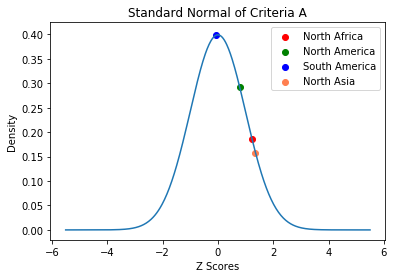

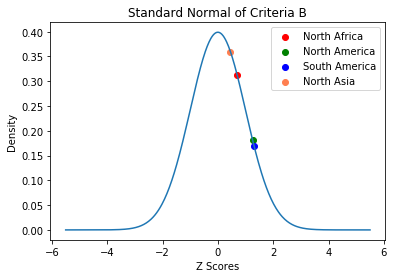

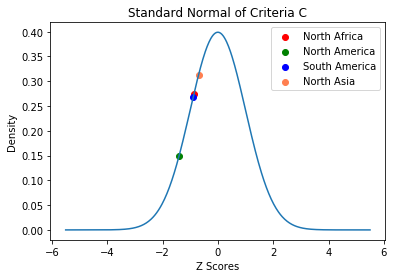

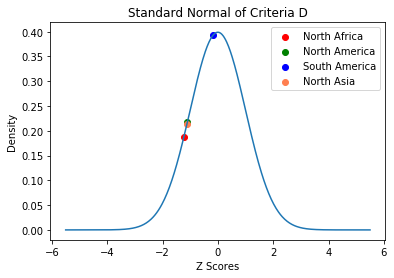

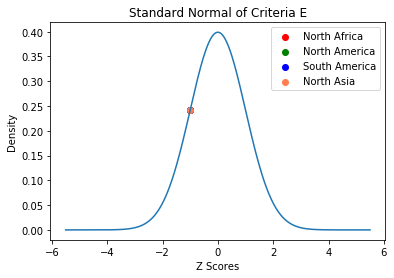

In [21]:
# choose a different color for each region
c=np.array(['r', 'g', 'b', 'coral'])

region_distribution_plot(z_df_expected_region['z_scoreA'], "Standard Normal of Criteria A",c)
region_distribution_plot(z_df_expected_region['z_scoreB'], "Standard Normal of Criteria B",c)
region_distribution_plot(z_df_expected_region['z_scoreC'], "Standard Normal of Criteria C",c)
region_distribution_plot(z_df_expected_region['z_scoreD'], "Standard Normal of Criteria D",c)
region_distribution_plot(z_df_expected_region['z_scoreE'], "Standard Normal of Criteria E",c)

For A, the observed mean is greater than the expected means in each region except for South America, for which it is slightly lower than the expected mean. For B, the observed mean is greater than the expected means for each region. For C and D, the observed mean is lower than the expected means for each region. For E, the observed mean is 0 for each region, thus the standard deviation from our expected mean is 0.2. The calculated mean is -1 because each value is exactly 1 standard deviation below the expected mean.
 
Most of the species in our dataset have a greater than or equal to 80% projected decrease in population rate because all of the regions have either around the mean or greater for their percent of species that fall under A. Most regions also have a higher than average percent of B, so most species are limited to geographic locations of less than 100 km^2. Almost all of the regions have less than average amounts of species with populations estimated to be less than either 50 or 250 mature individuals, so they have lower than average percentages of C and D.

In [22]:
# define a function to calculate chi square values for each region and criteria
# returns calculated chi square values
def chi_square(observed, expected):
    chi_vals = []
    for val in observed:
        chi_vals.append((val-expected)**2/expected)
    return chi_vals

# define function to help calculate the degrees of freedom for a dataframe of chi square values
# returns the degrees of freedom
def deg_free(df):
    col_count=-1
    for col in df:
        col_count+=1
        
    row_count=-1
    for row in df[col]:
        row_count+=1
        
    return row_count*col_count

In [23]:
# create a dataframe with chi square for each criteria and region
chi_df_region = pd.DataFrame({'chi_A': chi_square(region_percentsA, region_total_meanA), 'chi_B': chi_square(region_percentsB, region_total_meanB), 'chi_C': chi_square(region_percentsC, region_total_meanC), 'chi_D': chi_square(region_percentsD, region_total_meanD), 'chi_E': chi_square(region_percentsE, region_total_meanE)})

total_chi_sum = chi_df_region['chi_A'].sum()+chi_df_region['chi_B'].sum()+chi_df_region['chi_C'].sum()+chi_df_region['chi_D'].sum()+chi_df_region['chi_E'].sum()
print("Chi Square Value:", total_chi_sum)
print("Degrees of Freedom: "+str(deg_free(chi_df_region)))
print("P-Value: 0.9868")

Chi Square Value: 3.7995697057490037
Degrees of Freedom: 12
P-Value: 0.9868


A chi square test is used to determine the strength of correlation between two variables.

Null Hypothesis: There is a strong correlation between region and criteria.

Using a table, we determined that the p-value for our data is 0.9868. The p-value represents the probability that two variables are correlated. Because the calculated p-value is greater than the alpha value of 0.05, we fail to reject our null hypothesis. Additionally, the p-value is very close to 1 so the two variables are strongly correlated which indicates that clear trends within our dataset exist.

### Systems vs Criteria Distributions

We changed the name of the column Freshwater (=Inland water) to just Freshwater to simplify the column names in our charts.

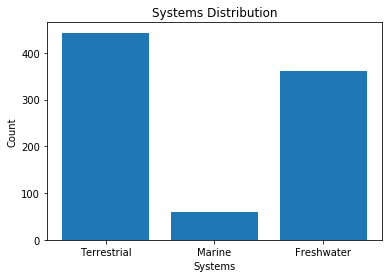

In [24]:
t_count=(critically_endangered['Terrestrial'].sum())
m_count=(critically_endangered['Marine'].sum())
f_count=(critically_endangered['Freshwater'].sum())

systems = ["Terrestrial", 'Marine', 'Freshwater']
sums = [t_count, m_count, f_count]

plt.bar(systems,sums)
plt.title('Systems Distribution')
plt.xlabel('Systems')
plt.ylabel('Count')
plt.show()

There are many more critically endangered species in Terrestrial and Freshwater systems than in the Marine system, which causes an extremely uneven distribution.

In [25]:
mean = (t_count+m_count+f_count)/3
print("Mean number of species per system:", mean)

std = np.sqrt(np.var(sums))
print("Standard deviation of species per system:", std)

Mean number of species per system: 288.3333333333333
Standard deviation of species per system: 164.80763196998967


The mean number is not reflective of the data as the Marine system is an outlier which skews the data. Therefore,  there is a lot of variance in the data, reflected by a high standard deviation.

In [26]:
# define a function to count the number of species in each criteria for a specific system
# returns a list of the value counts of species in each criteria for a specific system
def crit_system_graph(system):
    
    tempdf = critically_endangered
    
    criterias=['A','B','C','D','E']
    
    counts=[]
    
    tempdf = critically_endangered[critically_endangered['systems']==system]
    
    for criteria in criterias:
        counts.append(tempdf[criteria].sum())
    
    return counts

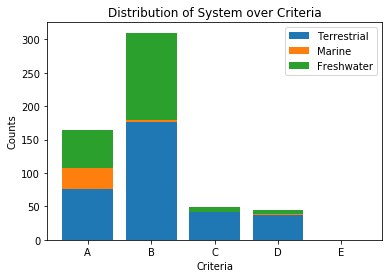

In [27]:
countsT = crit_system_graph('Terrestrial')
countsM = crit_system_graph('Marine')
countsF = crit_system_graph('Freshwater (=Inland waters)')

T_plot = plt.bar(['A','B','C','D','E'],height=countsT)
M_plot = plt.bar(['A','B','C','D','E'],height=countsM, bottom = countsT)
F_plot = plt.bar(['A','B','C','D','E'],height=countsF, bottom = add_lists(countsM,countsT))

plt.title('Distribution of System over Criteria')
plt.legend((T_plot, M_plot, F_plot), ('Terrestrial', 'Marine', 'Freshwater'))
plt.xlabel('Criteria')
plt.ylabel('Counts')
plt.show()

The Marine system primarily contains species in A, with low amounts of species in B and D. Terrestrial species dominate A, B, C, and D, emphasizing the extreme state of many Terrestrial species. Freshwater species are predominantly found in A and B, but some are found in C and D.

Most critically endangered marine species have greater than or equal to 80% projected decrease in population size, yet they are not limited to a specific geographic location, and are not constrained to a population of less than 250.

Freshwater species are likely to have a greater than or equal to 80% projected decrease in population size and are likely to be limited to a specific geographic location.

In [28]:
# define function to help determine the numbers of species in each system for a given criteria
# returns a list of the numbers of species in each system for a given criteria
def systemsgraph(criteria):
    
    systems=['Terrestrial','Marine','Freshwater']
    
    counts=[]
    
    # loop through list of systems to sum a column in the new dataframe with criteria dummy variables
    for system in systems:
        tempdf = critically_endangered
        tempdf = tempdf[tempdf[criteria]==1]
        tempdf = tempdf[tempdf[system]==1]
        counts.append(tempdf['systems'].count())
     
    return counts

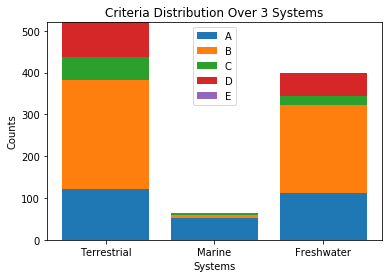

In [29]:
systems_countsA = systemsgraph('A')
systems_countsB = systemsgraph('B')
systems_countsC = systemsgraph('C')
systems_countsD = systemsgraph('D')
systems_countsE = systemsgraph('E')

A_plot = plt.bar(['Terrestrial','Marine','Freshwater'],height=systems_countsA)
B_plot = plt.bar(['Terrestrial','Marine','Freshwater'],height=systems_countsB, bottom = systems_countsA)
C_plot = plt.bar(['Terrestrial','Marine','Freshwater'],height=systems_countsC, bottom = add_lists(systems_countsA,systems_countsB))
D_plot = plt.bar(['Terrestrial','Marine','Freshwater'],height=systems_countsD, bottom = add_lists(add_lists(systems_countsA,systems_countsB),systems_countsC))
E_plot = plt.bar(['Terrestrial','Marine','Freshwater'],height=systems_countsE, bottom = add_lists(add_lists(add_lists(systems_countsA,systems_countsB),systems_countsC),systems_countsD))

plt.title('Criteria Distribution Over 3 Systems')
plt.legend((A_plot, B_plot, C_plot, D_plot, E_plot), ('A', 'B', 'C', 'D', 'E'))
plt.xlabel('Systems')
plt.ylabel('Counts')
plt.show()

The Terrestrial and Freshwater groups seem to have similar distributions of the categories. However, the Marine system is heavily dominated by A.

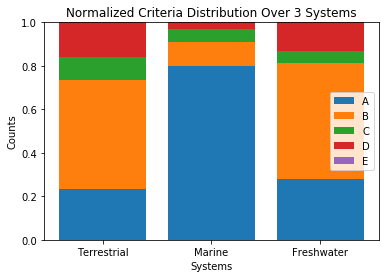

In [30]:
totals = []
for x in range(len(systems_countsA)):
    totals.append(systems_countsA[x]+systems_countsB[x]+systems_countsC[x]+systems_countsD[x]+systems_countsE[x])

systems_percentsA=[]
systems_percentsB=[]
systems_percentsC=[]
systems_percentsD=[]
systems_percentsE=[]

# convert counts to the percentages of each system
for x in range(len(systems_countsA)):
    systems_percentsA.append(systems_countsA[x]/totals[x])
    systems_percentsB.append(systems_countsB[x]/totals[x])
    systems_percentsC.append(systems_countsC[x]/totals[x])
    systems_percentsD.append(systems_countsD[x]/totals[x])
    systems_percentsE.append(systems_countsE[x]/totals[x])

A_plot = plt.bar(['Terrestrial','Marine','Freshwater'],height=systems_percentsA)
B_plot = plt.bar(['Terrestrial','Marine','Freshwater'],height=systems_percentsB, bottom = systems_percentsA)
C_plot = plt.bar(['Terrestrial','Marine','Freshwater'],height=systems_percentsC, bottom = add_lists(systems_percentsA,systems_percentsB))
D_plot = plt.bar(['Terrestrial','Marine','Freshwater'],height=systems_percentsD, bottom = add_lists(add_lists(systems_percentsA,systems_percentsB),systems_percentsC))
E_plot = plt.bar(['Terrestrial','Marine','Freshwater'],height=systems_percentsE, bottom = add_lists(add_lists(add_lists(systems_percentsA,systems_percentsB),systems_percentsC),systems_percentsD))

plt.title('Normalized Criteria Distribution Over 3 Systems')
plt.legend((A_plot, B_plot, C_plot, D_plot, E_plot), ('A', 'B', 'C', 'D', 'E'))
plt.xlabel('Systems')
plt.ylabel('Counts')
plt.show()

This graph further emphasizes that Terrestrial and Freshwater have a very similar criteria distributions. We expected the distribution to be similar for all three systems, but the Marine distribution is extremely different compared to the others. Critically endangered species found in Marine systems fall under A approximately 80% of the time. 

If there were to be any variation in criteria distribution, we would expect the Terrestrial system to be the most outlying as Marine and Freshwater both contain primarily aquatic species.

### Evaluation of Significance

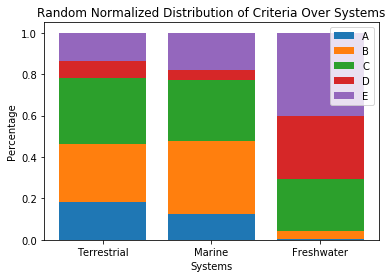

In [31]:
systems=['Terrestrial','Marine','Freshwater']
systems_meanlist = simulation(systems, "Systems")
        
b1=plt.bar(systems,systems_meanlist[0][0])
b2=plt.bar(systems,systems_meanlist[0][1], bottom=systems_meanlist[0][0])
b3=plt.bar(systems,systems_meanlist[0][2], bottom=add_lists(systems_meanlist[0][0],systems_meanlist[0][1]))
b4=plt.bar(systems,systems_meanlist[0][3], bottom=add_lists(add_lists(systems_meanlist[0][0],systems_meanlist[0][1]),systems_meanlist[0][2]))
b5=plt.bar(systems,systems_meanlist[0][4], bottom=add_lists(add_lists(add_lists(systems_meanlist[0][0],systems_meanlist[0][1]),systems_meanlist[0][2]),systems_meanlist[0][3]))

plt.legend((b1,b2,b3,b4,b5),('A','B','C','D','E'))
plt.title('Random Normalized Distribution of Criteria Over Systems')
plt.xlabel('Systems')
plt.ylabel('Percentage')
plt.show()

We hypothesized that each system would have equal distributions of criteria. We ran 10,000 simulations to calculate how our observed data compared to our hypothesis. Above is an example of one of our simulations.

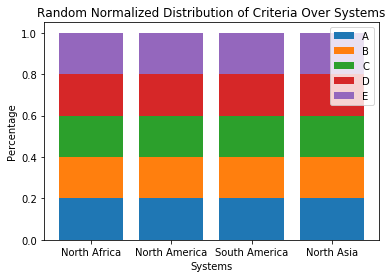

In [32]:
systems=['Terrestrial','Marine','Freshwater']
systems_meanlist_means = simulation(systems, "Systems")

list_a = [mean_count(systems_meanlist_means[1][0])]
list_b = [mean_count(systems_meanlist_means[1][1])]
list_c = [mean_count(systems_meanlist_means[1][2])]
list_d = [mean_count(systems_meanlist_means[1][3])]

b1=plt.bar(regions,mean_count(systems_meanlist_means[1][0]))
b2=plt.bar(regions,mean_count(systems_meanlist_means[1][1]), bottom=list_a)
b3=plt.bar(regions,mean_count(systems_meanlist_means[1][2]), bottom=add_lists(list_a, list_b))
b4=plt.bar(regions,mean_count(systems_meanlist_means[1][3]), bottom=add_lists(add_lists(list_a,list_b),(list_c)))
b5=plt.bar(regions,mean_count(systems_meanlist_means[1][4]), bottom=add_lists(add_lists(add_lists(list_a,list_b),(list_c)),list_d))

plt.legend((b1,b2,b3,b4,b5),('A','B','C','D','E'))
plt.title('Random Normalized Distribution of Criteria Over Systems')
plt.xlabel('Systems')
plt.ylabel('Percentage')
plt.show()

We took the means of each criteria for the 10,000 simulations and plotted them to display the average random simulation.

In [33]:
systems_total_meanA = mean_count(systems_meanlist[1][0])
systems_total_meanB = mean_count(systems_meanlist[1][1])
systems_total_meanC = mean_count(systems_meanlist[1][2])
systems_total_meanD = mean_count(systems_meanlist[1][3])
systems_total_meanE = mean_count(systems_meanlist[1][4])

print("Expected Mean of Criteria A:", systems_total_meanA)
print("Expected Mean of Criteria B:", systems_total_meanB)
print("Expected Mean of Criteria C:", systems_total_meanC)
print("Expected Mean of Criteria D:", systems_total_meanD)
print("Expected Mean of Criteria E:", systems_total_meanE)

Expected Mean of Criteria A: 0.19977930213911965
Expected Mean of Criteria B: 0.20084791271531285
Expected Mean of Criteria C: 0.20026655079576192
Expected Mean of Criteria D: 0.19943962400380122
Expected Mean of Criteria E: 0.19966661034600242


### Statistical Analysis

In [34]:
# define a function to plot z-scores of criteria distributions over systems over a normal distribution
def systems_distribution_plot(zscores, title, c):
    
    x_vals = np.linspace(-7,7,500)
    plt.plot(x_vals, norm.pdf(x_vals, 0, 1))
    scatter_T=plt.scatter(zscores[0], norm.pdf(zscores[0], 0, 1), c=c[0][0])
    scatter_M=plt.scatter(zscores[1], norm.pdf(zscores[1], 0, 1), c=c[0][1])
    scatter_F=plt.scatter(zscores[2], norm.pdf(zscores[2], 0, 1), c=c[0][2])
    
    plt.title(title)
    plt.xlabel("Z Scores")
    plt.ylabel("Density")
    plt.legend((scatter_T, scatter_M, scatter_F), ('Terrestrial', 'Marine', 'Freshwater'))
    plt.show()

colormap = np.array(['r', 'g', 'b'])
c=[]
c.append(colormap)

In [35]:
# create a dataframe with z-scores for each criteria and system
z_df_expected_systems = pd.DataFrame({'Systems': ['Terrestrial', 'Marine', 'Freshwater'], 'z_scoreA': z_score(systems_percentsA, systems_total_meanA), 'z_scoreB': z_score(systems_percentsB, systems_total_meanB), 'z_scoreC': z_score(systems_percentsC, systems_total_meanC), 'z_scoreD': z_score(systems_percentsD, systems_total_meanD), 'z_scoreE': z_score(systems_percentsE, systems_total_meanE)})                                                                                                                                                                                                                          
print(z_df_expected_systems)

       Systems  z_scoreA  z_scoreB  z_scoreC  z_scoreD  z_scoreE
0  Terrestrial  0.099499  1.135371 -0.737920 -0.371752      -1.0
1       Marine  1.714362 -0.353553 -1.083313 -1.574506      -1.0
2   Freshwater  0.225970  1.259338 -1.132213 -0.618653      -1.0


We calculated z-scores to determine the number of standard deviations between the observed means and the expected means for percentages of species in each criteria for each system. 

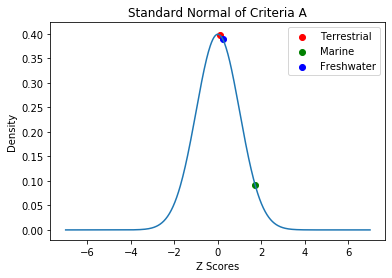

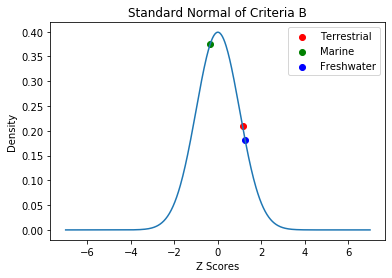

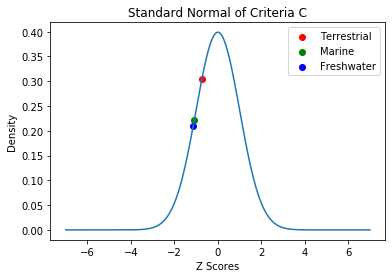

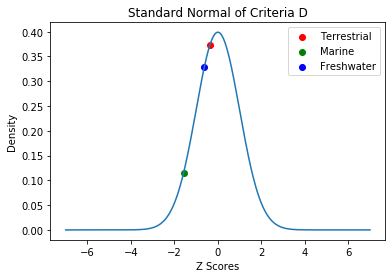

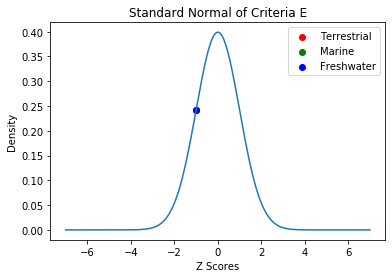

In [36]:
systems_distribution_plot(z_df_expected_systems['z_scoreA'], "Standard Normal of Criteria A",c)
systems_distribution_plot(z_df_expected_systems['z_scoreB'], "Standard Normal of Criteria B",c)
systems_distribution_plot(z_df_expected_systems['z_scoreC'], "Standard Normal of Criteria C",c)
systems_distribution_plot(z_df_expected_systems['z_scoreD'], "Standard Normal of Criteria D",c)
systems_distribution_plot(z_df_expected_systems['z_scoreE'], "Standard Normal of Criteria E",c)

For A, the z-scores lie to the right of 0, indicating that all systems have a greater proportion of species with A than expected. The Marine system has a very high z-score, which indicates that many more species than average have a greater than or equal to 80% projected decrease in population.

For B, the z-scores for Terrestrial and Freshwater lie to the right of 0 and marine lies to the left of 0. Thus, Terrestrial and Freshwater species tend to be limited to a geographic location of less than 100 km^2 while Marine species are not.

For C and D, the z-scores lie to the left of 0, indicating that all systems have a lower proportion of species with populations estimated to be less than both 250 and 50 mature individuals.

In [37]:
# create a dataframe with chi square for each criteria and system
chi_df_systems = pd.DataFrame({'chi_A': chi_square(systems_percentsA, systems_total_meanA), 'chi_B': chi_square(systems_percentsB, systems_total_meanB), 'chi_C': chi_square(systems_percentsC, systems_total_meanC), 'chi_D': chi_square(systems_percentsD, systems_total_meanD), 'chi_E': chi_square(systems_percentsE, systems_total_meanE)})

total_chi_sum = chi_df_systems['chi_A'].sum()+chi_df_systems['chi_B'].sum()+chi_df_systems['chi_C'].sum()+chi_df_systems['chi_D'].sum()+chi_df_systems['chi_E'].sum()
print("Chi Square Value:", total_chi_sum)
print("Degrees of Freedom: "+str(deg_free(chi_df_systems)))
print("P-Value: 0.8647")

Chi Square Value: 3.894962610156718
Degrees of Freedom: 8
P-Value: 0.8647


Null Hypothesis: There is a strong correlation between systems and criteria.

Using a table, we determined the p-value. Because the calculated p-value is greater than the alpha value of 0.05, we fail to reject our null hypothesis. Additionally, the p-value is very close to 1 so the two variables are strongly correlated, which indicates that clear trends within our dataset exist.

## Conclusion

#### Region
The difference in region populations implies that some criteria are more prevalent in specific regions, but the concentration distributions and probability tests show that the criteria are pretty fairly distributed across the regions. There aren't any regions with significantly higher proportions of one category. However, the criteria are not equally distributed across each individual region.

We expected species in C to outnumber species in D in all regions, as it is more likely for a species to range from 50 to 250 individuals than 0 to 50, but this was not the case in all regions. Category D appears to outnumber C in terms of population count, but C actually has higher proportions than D in all regions except South America. South America is the only region with much higher concentrations of criteria D than C. South America accounts for almost all of the species in category D, so it contains species that are far closer to extinction than any other region.

South America stands out as containing the highest population of critically endangered species by far, mostly falling under A, B, and D. All regions have similar proportions of criteria populations, but South America simply has the highest population of all critically endangered species. Because the trends in our dataset amongst the four regions are very similar, we can infer these trends are reflected in the entire population of critically endangered species around the world.

#### Systems
We originally assumed Marine and Freshwater would have the closest population counts and criteria distribution because they are both aquatic environments, but found that Terrestrial and Freshwater actually have very similar counts and distributions. Marine species have completely different levels of criteria and concentrations.

Marine species fall under A much more than all other categories combined, so projected declines in population are their most significant problem. We concluded that Marine species are not as impacted by B, C, D, or E possibly because they are not geographically constrained (they can travel great distances in the ocean) and many tend to mate by laying hundreds of eggs at a time, so their population dropping below 250 or 50 is not as common. We are aware that because of the relatively low population of Marine species, the concentration distribution may be less accurate than the other species.

Because the Terrestrial and Freshwater criteria distributions are extremely similar, we would expect a chi square value of near 1, but the Marine criteria distribution decreases the chi square score value. However, it is still significantly high (0.8647), so we can still reject the null hypothesis.

#### Final Comparison
Normalizing our data allowed us to see clear trends because the population counts alone varied greatly. The normalized data could still be skewed as regions and systems higher sample sizes have more accurate population distributions than those with smaller sample sizes.

Our purpose for comparing Red List criteria to both regions and systems was to determine if there was a similar breakdown of criteria amongst different geographical categorizations. We found that in both categorizations, similar trends arose. Because the chi squre values for both region and systems are extremely high, we are fairly confident in our analysis that there is strong correlation between the variables tested.

Across both regions and systems, A and B were the most popular categories. While they are not as severe as D, A and B signify that species projected with an 80% or higher chance of going extinct and species constrained to only 100 km^2 are common in all environments and regions, so these problems must be addressed to reduce the high number of critically endangered species.

Population size of less than 50 is the most severe category because these species are extremely close to extinction. We would advise action to be taken in South America because this region has the greatest number of critically endangered species, especially those in D.

## Source Code

Here you can find a link to our previous work (https://github.coecis.cornell.edu/cek223/INFO-2950). Organized as follows:
* Previous Work: Folder containing every stage of our working process
* Final Project: Folder containing 5 documents:
    * final_report.ipynb - A notebook containing our complete analysis of the data
    * data_processing.ipynb - A notebook used to process the raw data
    * additional_work.ipynb - A notebook containing all other work not included in the Final Report
    * critically_endangered_filtered.csv - A CSV file containing raw data
    * critically_endangered_processed.csv - A CSV file containing the processed data

## Acknowledgments


* https://portals.iucn.org/library/sites/library/files/documents/RL-2001-001-2nd.pdf
* https://stackoverflow.com/questions/29960733/how-to-convert-true-false-values-in-dataframe-as-1-for-true-and-0-for-false
* https://stackoverflow.com/questions/45147100/pandas-drop-columns-with-all-nans
* https://mode.com/python-tutorial/counting-and-plotting-in-python/
* https://www.interviewqs.com/ddi_code_snippets/drop_duplicate_rows_pandas 
* https://www.youtube.com/watch?v=Nb3a7FMUQyo
* And our TA, Adeyemi Oyemade, for meeting with us multiple times and giving us really helpful constructive feedback